In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = 'https://www.binghamton.edu/watson/student-services/advising/coursedescriptions.html'
doc = urlopen(url)
soup = BeautifulSoup(doc, 'html.parser')

courses_html = soup.find_all('li', {'class':'accordion-item'})
print('Found {} course(s)'.format(len(courses_html)))

Found 526 course(s)


In [2]:
import pandas as pd

courses = {}
[courses.update({course.a['aria-controls']:[course.a.text,course.p.text]}) for course in courses_html]
df = pd.DataFrame.from_dict(courses, orient='index', columns=['name','desc'])

df = pd.concat([df,pd.DataFrame(df.index.str.split('-',1).tolist(), columns = ['school','class_number'],index = df.index)], axis=1,sort=False)
df['class_level']=df.class_number.str[0]+'00'

pd.options.display.max_colwidth = 1000
df.head(3)

name  \
WTSN-101                  WTSN 101 - The Student Success Course   
WTSN-103   WTSN 103 - Engineering Communications\n            I   
WTSN-104  WTSN 104 - Engineering Communications\n            II   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
WTSN-101  Watson 101 is a seminar course for new Watson and Harpur students, interested\n            in Science, Technology, Engineering, or Math (STEM) majors, to assist in their transition\n            to the University. Students will be provided with opportunities to explore campus\n            resources, potential STEM careers, and personal learning styles, as well as develop\n            skills in oral presentations, critical thinking, and time management. This section\n            is only for students in the Louis Stokes Alliance for Minority Participation (LSAMP)\n            program.  Offered in the Fall semester. 2 credits.\n            \n            Levels: Undergraduate   
WTSN-103                                                                                                                                                                                                                  Develops student's critical thinking skills through the completion of\n            two team-based projects. Emphasis is on teaming skills, critical reading, technical\n            writing, oral presentation skills, project management and professionalism. A technical\n            report and two professional presentations are required. Corequisite: WTSN 111 (linked).\n            Offered in the Fall semester.  2 credits.\n            \n            Levels: Undergraduate   
WTSN-104                                                                                                                                                                                                  This class builds on the skills introduced in WTSN 103. Critical reading, engineering\n            research, and writing through a Conceptual team-based project is emphasized. Two formal\n            presentations, two research papers using APA documentation style and a technical report\n            are required. Prerequisite: WTSN 103, WTSN 111.  Corequisite: WTSN 112 (Linked). \n            Offered in the Spring semester. 2 credits.\n            \n            Levels: Undergraduate   

         school class_number class_level  
WTSN-101   WTSN          101         100  
WTSN-103   WTSN          103         100  
WTSN-104   WTSN          104         100

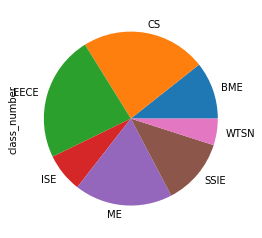

In [25]:
df.groupby(['school'])['class_number'].count().plot.pie()

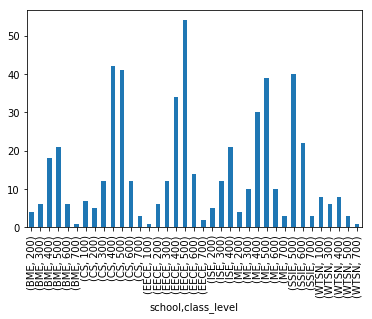

In [4]:
df.groupby(['school','class_level'])['class_number'].count().plot.bar()

# Some things I'd like to see
Virtualization / Cloud Orchestration



In [5]:
df[df.desc.str.upper().str.contains('VIRTUALIZATION')]

name  \
CS-311  CS 311 - Operating Systems Concepts   
CS-350           CS 350 - Operating Systems   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        desc  \
CS-311                                                                                                                                                Introduction to fundamental concepts for the design and implementation of operating\n            systems: hardware/software interfaces; processes and threads; scheduling; synchronization\n            techniques and primitives; memory management and virtual memory; file systems; input/output\n            subsystems; resource and system virtualization; protection and security; introduction\n            to distributed systems. Not open to CS majors. Prerequisites: CS 212 and EECE 252.\n            Offered in the Fall semester. 4 credits\n            \n            Levels: Graduate, Undergraduate   
CS-350  ntroduction to fundamental concepts for the design and implementation of operating\n            systems: hardware/software interfaces; processes and threads; scheduling; synchronization\n            techniques and primitives; memory management and virtual memory; file systems; input/output\n            subsystems; resource and system virtualization; protection and security; introduction\n            to distributed systems. Required lab includes student presentations. Prerequisites:\n            CS 220 and CS 240 (All prerequisites must have a grade of C- or better).  Prerequisite\n            (May not be taken concurrently. ): CS 301. Offered every semester.  4 credits\n            \n            \n            Levels: Undergraduate   

       school class_number class_level  
CS-311     CS          311         300  
CS-350     CS          350         300

In [24]:
import textdistance as td

sim_score = td.jaro_winkler(df.loc['CS-311'].desc, df.loc['CS-350'].desc)
print('Descriptions for CS-311 and CS-350 are {:0.2f}% similar (using Jaro-Winkler).'.format(sim_score*100))

Descriptions for CS-311 and CS-350 are 88.79% similar (using Jaro-Winkler).


In [7]:
df[df.desc.str.upper().str.contains('CLOUD')]

name  \
CS-443  CS 443 - Mobile Systems & Applications   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        desc  \
CS-443  This course covers topics of designing and implementing mobile systems \n            and applications. Examples include smartphone application design and development,\n            wireless communications, location based services, mobile sensing, mobile computing\n            security, mobile cloud computing, mobile computing energy efficiency, human-computer\n            interactions with mobile devices etc. Students are expected to learn fundamentals\n            of mobile computing, get exposed to emerging mobile computing topics, and gain hands-on\n            experience in designing and developing mobile systems and Prerequisite: CS 320 and\n            CS 350 (All prerequisites must have a grade of C- or better). Term offered varies.\n            4 credits\n            \n            Levels: Undergraduate   

       school class_number class_level  
CS-443     CS          443         400

Hands On Patterns (Docker/k8s Experience)
https://www.oreilly.com/library/view/designing-distributed-systems/9781491983638/

In [8]:
df[df.desc.str.upper().str.contains('DISTRIBUTED SYSTEMS')]

name  \
CS-311    CS 311 - Operating Systems Concepts   
CS-350             CS 350 - Operating Systems   
CS-457  CS 457 - Intro To Distributed Systems   
CS-557  CS 557 - Intro To Distributed Systems   
ME-627             ME 627 - Random Vibrations   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        desc  \
CS-311                                                                                                                                                Introduction to fundamental concepts for the design and implementation of operating\n            systems: hardware/software interfaces; processes and threads; scheduling; synchronization\n            techniques and primitives; memory management and virtual memory; file systems; input/output\n            subsystems; resource and system virtualization; protection and security; introduction\n            to distributed systems. Not open to CS majors. Prerequisites: CS 212 and EECE 252.\n            Offered in the Fall semester. 4 credits\n            \n            Levels: Graduate, Undergraduate   
CS-350  ntroduction to fundamental concepts for the design and implementation of operating\n            systems: hardware/software interfaces; processes and threads; scheduling; synchronization\n            techniques and primitives; memory management and virtual memory; file systems; input/output\n            subsystems; resource and system virtualization; protection and security; introduction\n            to distributed systems. Required lab includes student presentations. Prerequisites:\n            CS 220 and CS 240 (All prerequisites must have a grade of C- or better).  Prerequisite\n            (May not be taken concurrently. ): CS 301. Offered every semester.  4 credits\n            \n            \n            Levels: Undergraduate   
CS-457                                                                                                                                                                                                                                                                                    Fundamental issues in distributed systems. Distributed synchronization and\n            concurrency control. Distributed process management (scheduling, remote invocation,\n            task forces, load balancing). Protection and security. Robust distributed systems.\n            Case studies. Prerequisites: CS 350 (All prerequisites must have a grade of C- or\n            better).  Term offered varies.  4 credits\n            \n            Levels: Undergraduate   
CS-557                                                                                                                                                                                                                                                                                                                                             Fundamental issues in distributed systems.  Distributed synchronization and\n            concurrency control. Distributed process management (scheduling, remote invocation,\n            task forces, load balancing). Protection and security. Robust distributed systems.\n            Case studies. Prerequisite: CS 350.  Term offered varies.  3 credits\n            \n            Levels: Graduate, Und

Site Reliability / Autonomous Systems

In [9]:
df[df.desc.str.upper().str.contains('QA')]

name  \
CS-445  CS 445 - Software Engineering   
CS-545  CS 545 - Software Engineering   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      desc  \
CS-445  Software engineering practice applied to the life cycle of software applications\n            and engineering projects. Software project planning and management: risk management,\n            estimation, scheduling, trade studies, CM and SQA. Software development: process model\n            selection, domain analysis, requirements gathering, analysis and design modeling,\n            user interface design, architectural and detailed design, documentation, testing strategies/methods,\n            test plan generation, and reuse. Advanced topics include formal methods and cleanroom\n            software engineering. Requires a major team project. Prerequisites: CS 350 or CS 375\n            (All prerequisites must have a grade of C- or better).  Term offered varies.  4 credits\n            \n            Levels: Undergraduate   
CS-545                                                   Software engineering practice applied to the life cycle of large software applications\n            and engineering projects. Software project planning and management: risk management,\n            estimation, scheduling, trade studies, CM and SQA. Software development: process model\n            selection, domain analysis, requirements gathering, analysis and design modeling,\n            user interface design, architectural and detailed design, documentation, testing strategies/methods,\n            test plan generation, and reuse. Advanced topics include formal methods and cleanroom\n            software engineering. Requires a major team project. Prerequisite: CS 375.  Term offered\n            varies.  3 credits\n            \n            Levels: Graduate, Undergraduate   

       school class_number class_level  
CS-445     CS          445         400  
CS-545     CS          545         500

In [10]:
df[df.desc.str.upper().str.contains('RELIABILITY')]

name  \
WTSN-581               WTSN 581 - Intro To Electronics Packaging   
EECE-422                EECE 422 - Princ of Electro Mech Systems   
ME-627                                ME 627 - Random Vibrations   
ISE-473                      ISE 473 - Processes for Electr Mfg.   
SSIE-562                                  SSIE 562 - Reliability   
SSIE-578                    SSIE 578 - Processes for Electr Mfg.   
SSIE-633                       SSIE 633 - Advanced Human Factors   
SSIE-660                           SSIE 660 - Stochastic Systems   
SSIE-673  SSIE 673 - Adv Iss In Proc For Electr\n            Pkg   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
WTSN-581  The objective of this course is to familiarize the student with the basic concepts\n            of electronic packaging. This includes a description of the various types of electronic\n            packages, interconnects and structures. The course will acquaint the student with\n            terminology in the packaging industry and key technical issues and concerns. In addition\n            to topics from first level to system level packaging, the course will also include\n            a discussion on the current state of the electronics packaging industry.The seminar\n            series will begin with a basic overview of the various electronic package types and\n            characteristics. A brief introduction to the materials, mechanical, thermal, reliability\n            and assembly processing aspects of packaging will also be covered. Newer, and more\n            advanced developments will be included such as copper pillar interconnect, 2.5D and\n            3D packaging. Thi...   
EECE-422  With the surge in use of electro-mechanical systems ranging from robotic systems\n            to small passenger vehicles to multi-megawatt windmills, and many other systems, there\n            is an increasing need for a combination of electrical engineering and mechanical engineering\n            expertise applied to electro-mechanical systems. Fundamental technical areas from\n            electrical engineering include basic circuit theory, power electronics, DC motors\n            and generators, control theory, and batteries. Fundamental technical principles from\n            mechanical engineering include torque, vibration, heat dissipation, stress and strain,\n            and strength of materials. Controls, reliability, efficiency and coupling between\n            electrical drives and internal combustion engines are important topics spanning both\n            mechanical and electrical engineering. These technical areas will be covered from\n            a systems perspectiv...   
ME-627                                                                                                                                                                                                                                                                                         Methods for analyzing the response of vibrating syste

In [11]:
df[df.desc.str.upper().str.contains('AUTONOMOUS')]

name  \
CS-424  CS 424 - Microcontrollers And Robotics   
ME-428                       ME 428 - Robotics   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           desc  \
CS-424  Microprocessor-based systems in hardware control. Embedded microcontroller\n            systems: architectures and instruction sets for microprocessors and microprocessor-based\n            control systems; memory and I/O port organization; serial and parallel I/O; timers;\n            interrupts; ADC; DAC. Robotics: hardware; software; motion control; interaction control;\n            actuators and sensors; trajectory planning; navigation; image processing and vision\n            systems; operating systems and programming languages; multitasking; robot behavior\n            and intelligence architectures; robot kinematics and dynamics. Supervised laboratory\n            work involves microprocessor programming, interfacing and hardware control experiments.\n            Students working in teams design and build mobile, autonomous, microprocessor-controlled\n            robots and program them to perform a variety of tasks. Prerequisite  (May not be taken\n            concurrently ...   
ME-428                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    This course focuses on the design and building of an autonomous microcomputer-controlled\n            robot using Lego Mindstorm Robotic kit and electro-mechanical actuators and sensors.\n            Students will work in teams and robots will compete at the end of the semester. (Technical\n            elective.) Prerequisites: ME 212 and senior standing in engineering.  Term offered\n            varies.  3 credits\n            Levels: Undergraduate   

       school class_number class_level  
CS-424     CS          424         400  
ME-428     ME          428         400

Augmented / Virtual Reality (Holodecks!)

In [12]:
df[df.desc.str.upper().str.contains('REALITY')]

name  \
CS-338  CS 338 - Introduction To Multimedia\n            Sys   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  desc  \
CS-338  Video and audio processing including file encoding/decoding, modeling, image\n            creation and manipulation, animation and, if time permits, augmented reality. Projects\n            will involve use of commonly available applications and basic graphics programming\n            techniques to create and process graphic images and animation. Prerequisites: CS 212\n            or CS 240 (All prerequisites must have a grade of C- or better).  Term offered varies.\n            4 credits\n            \n            Levels: Undergraduate   

       school class_number class_level  
CS-338     CS          338         300

In [13]:
df[df.desc.str.upper().str.contains('GAME')]

name  \
CS-441                   CS 441 - Game Devel for Mobile Platform   
CS-459                        CS 459 - Science of Cyber Security   
CS-476                   CS 476 - Program Models Emerg Platforms   
CS-559X                      CS 559X - Science of Cyber Security   
CS-576                   CS 576 - Program Models Emerg Platforms   
ISE-320    ISE 320 - Optimiz & Operation Research\n            I   
ISE-418    ISE 418 - Collective Dyn of Complex\n            Syst   
SSIE-523  SSIE 523 - Collective Dyn of Complex\n            Syst   
SSIE-553                          SSIE 553 - Operations Research   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
CS-441                                                                                                                                                                                               This course focuses software development for mobile computing platforms, such\n            as smartphones and tables, with an emphasis on games.  Students will develop interactive\n            applications, and utilize the wide variety of sensors and networking features available\n            on the platform, along with basic elements of graphics programming and animation.\n            The course also covers the mechanics of distributing software for mobile computing\n            platforms.  Both iOS and Android operating systems will be covered.  The course will\n            feature a mix of individual and team projects. Prerequisite: CS 140 , CS 375.  (All\n            prerequisites must have a grade of C- or better).  Term offered varies.  4 credits.\n            \n            Levels: Undergraduate   
CS-459    This course focuses on techniques that approach cyber security problems in\n            a principled manner using concepts from data mining, game theory, graph theory, and\n            psychology. The intent of this course is to permit students to bridge the divide between\n            real-world cyber threats and formal, scientific foundations of solutions that address\n            such threats. Real-world cyber security issues, such as spamming, phishing attacks,\n            malware, sybil attacks in social networks, and DDoS attacks, are used to illustrate\n            how cyber threats can be modeled with abstract representations that are amenable to\n            rigorous analysis and formal reasoning. The course also emphasizes the development\n            of cyber defense mechanisms that are rooted in scientific foundations.  Prerequisite:\n            MATH 327 or MATH 448, CS 375. Prerequisite  (May not be taken concurrently. ): CS\n            458.  4 credits\n            ...   
CS-476    The landscape of computation platforms has changed dramatically in recent years.\n            Multi-core CPUs, CUDA-enabled game chips, and Android-powered smartphones are widely\n            available to millions of users, but programming on these emerging platforms remains\n            a challenging task. This course introduce

In [14]:
df[df.desc.str.upper().str.contains('UX')]

Empty DataFrame
Columns: [name, desc, school, class_number, class_level]
Index: []

In [15]:
df[df.desc.str.upper().str.contains('USER EXPERIENCE')]

Empty DataFrame
Columns: [name, desc, school, class_number, class_level]
Index: []

In [16]:
df[df.desc.str.upper().str.contains('HCI')]

Empty DataFrame
Columns: [name, desc, school, class_number, class_level]
Index: []